# FCIM.M.IA - Artificial Intelligence

> **Lab 1:** Expert Systems \\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [2]:
import random
from IPython.display import Image
from rules import TOURIST_DATA
from production import IF, AND, THEN, OR
from production import (populate,forward_chain, backward_chain)
from helpers.question_helper import extract_multiple_choice_answer
from helpers.chain_helper import chain

## Task 1 -- Define 5 types of tourists that visit Luna-City. Draw the Goal Tree representing these types of tourists.

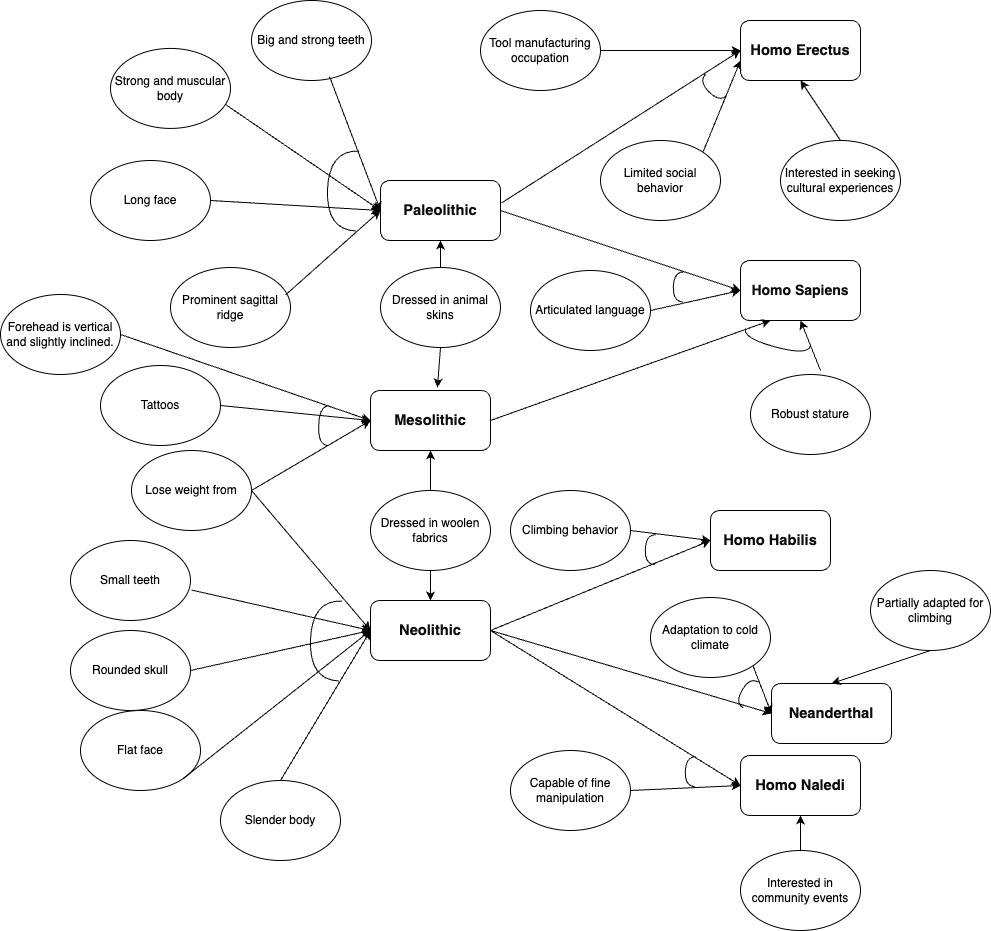

In [4]:
Image(filename="./results/5 types - tourists.jpg")

## Task 2 -- Implement the rules from the defined tree in Task 1 in your code (use the IF, AND, OR and THEN rules which are already implemented).

In [ ]:
TOURIST_RULES = (

    IF(AND('(?x) has strong and muscular body',       # H1
           '(?x) has big and strong teeth',
           '(?x) has long face',
           '(?x) has prominent sagittal ridge'),
       THEN('(?x) is from Paleolithic')),

    IF(OR('(?x) dressed in animal skins',             # H2
          '(?x) dressed in woolen fabrics'),
       THEN('(?x) is from Mesolithic')),

    IF(AND('(?x) has tattoos',                         # H3
           '(?x) has forehead is vertical and slightly inclined'
           '(?x) has loses weight from'),
       THEN('(?x) is from Mesolithic')),

    IF(AND('(?x) has small teeth',                     # H4
           '(?x) has rounded skull',
           '(?x) has flat face',
           '(?x) has slender body',
           '(?x) has loses weight from'),
        THEN('(?x) is from Neolithic')),

    IF(AND('(?x) is from Paleolithic',                  # H8
           '(?x) has a limited social behavior'),
       THEN('(?x) is Homo Erectus')),

    IF(OR('(?x) has tool manufacturing occupation',      # H9
          '(?x) has interested in seeking cultural experiences'),
        THEN('(?x) is Homo Erectus')),

    IF(AND('(?x) has articulated language',              # H11
           '(?x) is from Paleolithic'),
        THEN('(?x) is Homo Sapiens')),

    IF(AND('(?x) has robust stature',                    # H12
           '(?x) is from Mesolithic'),
        THEN('(?x) is Homo Sapiens')),

    IF(AND('(?x) has climbing behavior',                 # H13
           '(?x) is from Neolithic'),
       THEN('(?x) is Homo Habilis')),

    IF(AND('(?x) is from Neolithic',                     # H14
           '(?x) has adaptation to cold climate'),
       THEN('(?x) is Neanderthal')),

    IF(AND('(?x) is from Neolithic',                     # H15
           '(?x) has capable of fine manipulation'),
       THEN('(?x) is Homo Naledi')),
)

## Task 3 -- Check how the Forward Chaining algorithm works and illustrate an example.

In [ ]:
print("Performing Forward Chaining")
results = forward_chain(TOURIST_RULES, TOURIST_DATA)
print("Result of Forward Chaining:", results)

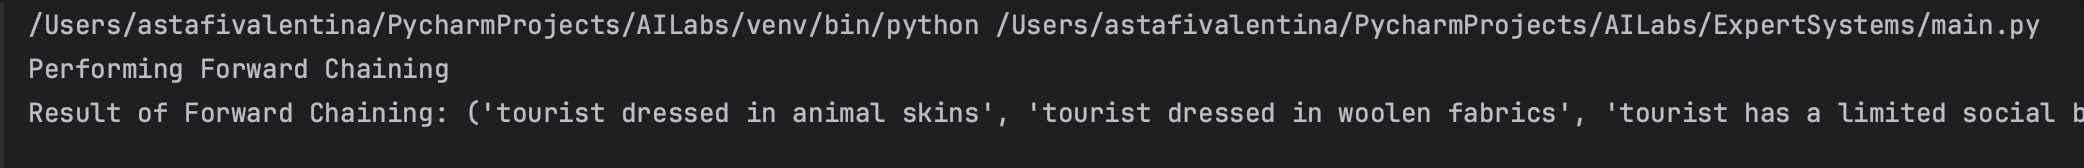

In [9]:
Image(filename="./results/ForwardChaining.jpg")

## Task 4 -- Implement the Backward Chaining algorithm for the Goal Tree.

In [1]:
def backward_chain(rules, hypothesis, verbose=False):
    backward_chain_result = [hypothesis]
    for rule in rules:
        action = rule.consequent().__repr__()
        condition = rule.antecedent()
        node_matching = match(action, hypothesis)
        if not (node_matching is None) and all(isinstance(val, str) for val in condition.conditions()):
            if isinstance(condition, (OR, AND)):
                for index in range(len(condition)):
                    new_hypothesis = populate(condition[index], node_matching)
                    condition[index] = backward_chain(rules, new_hypothesis)
                backward_chain_result.append(simplify(condition))
            else:
                new_node = populate(condition, node_matching)
                backward_chain_result.append(new_node)
    return backward_chain_result


## Task 5 -- Implement a system for generating questions from the Goal Tree. Have at least 2 or 3 types of questions (e.g yes / no, multiple choice, etc). 

In [ ]:
def generate_question_tree(known_rules, used_rules):
    rules_tree = dict()
    for rule in general_rules:
        new_rules = [new_rule for new_rule in rule.antecedent() if new_rule not in used_rules]
        for current_rule in new_rules:
            if current_rule not in rules_tree:
                rules_tree[current_rule] = []
            additional_rules = \
                [dif_rule for dif_rule in new_rules if (dif_rule != current_rule and dif_rule not in known_rules)]
            if additional_rules:
                rules_tree[current_rule].append(additional_rules)
    return rules_tree

In [ ]:
def generate_multiple_choice_questions(question_choices):
    question_choices.append("None")
    subject_list = ["the person", "him/her", "the tourist"]  
    subject = random.choice(subject_list)
    question = f"What is true about {subject}:\n" + \
               "\n".join([f"{i + 1}. {question_choices[i].replace('(?x) ', '')}" for i in range(len(question_choices))])
    return question

In [ ]:
def generate_yes_no_questions(question_content):
    subject_list = ["the person", "he/she", "the tourist"]  
    subject = random.choice(subject_list)
    question_body = populate(question_content, {"x": subject})
  
    if ' is ' in question_body:
        question_body = question_body.replace('is ', "")
        question = f"Is {question_body}?"
    elif ' has ' in question_body:
        question_body = question_body.replace("has", "have")
        question = f"Does {question_body}"
    else:
        words = question_body.split()
        question_body = question_body.replace(words[1], words[1][:-1])
        question = f"Does {question_body}"
    return question


## Task 6 -- Wrap up everything in an interactive Expert System that will dynamically ask questions based on the input from the user. Both Forward Chaining and Backward Chaining should be working. 

In [ ]:
def run_expert_system():
    stop_system = False

    while not stop_system:

        input_name = input("Please provide the name of the tourist:")
        input_mode = extract_multiple_choice_answer(["Forward chain", "Backward chain"])
        session_data = {"name": input_name, "mode": input_mode}

        stop_system = chain(session_data)

if __name__=='__main__':
    print("Welcome to Expert System!")

    run_expert_system()

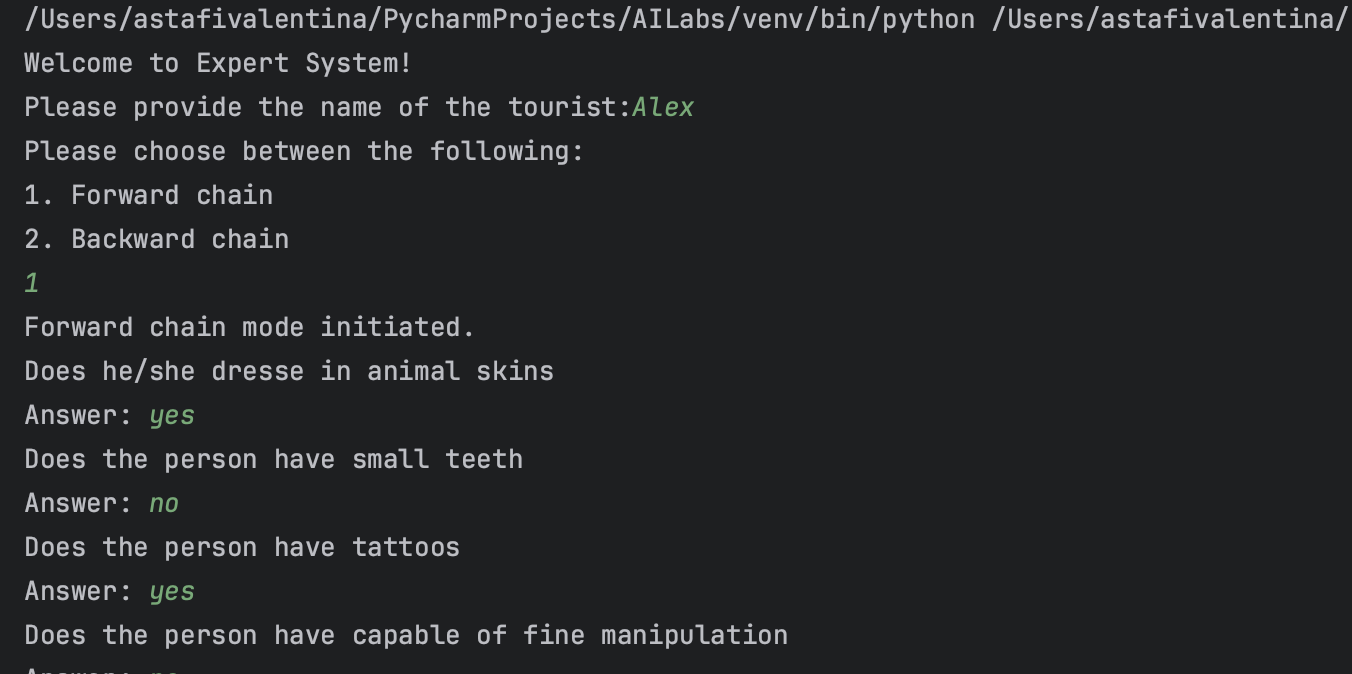

In [7]:
Image(filename="./results/Forward.jpg")

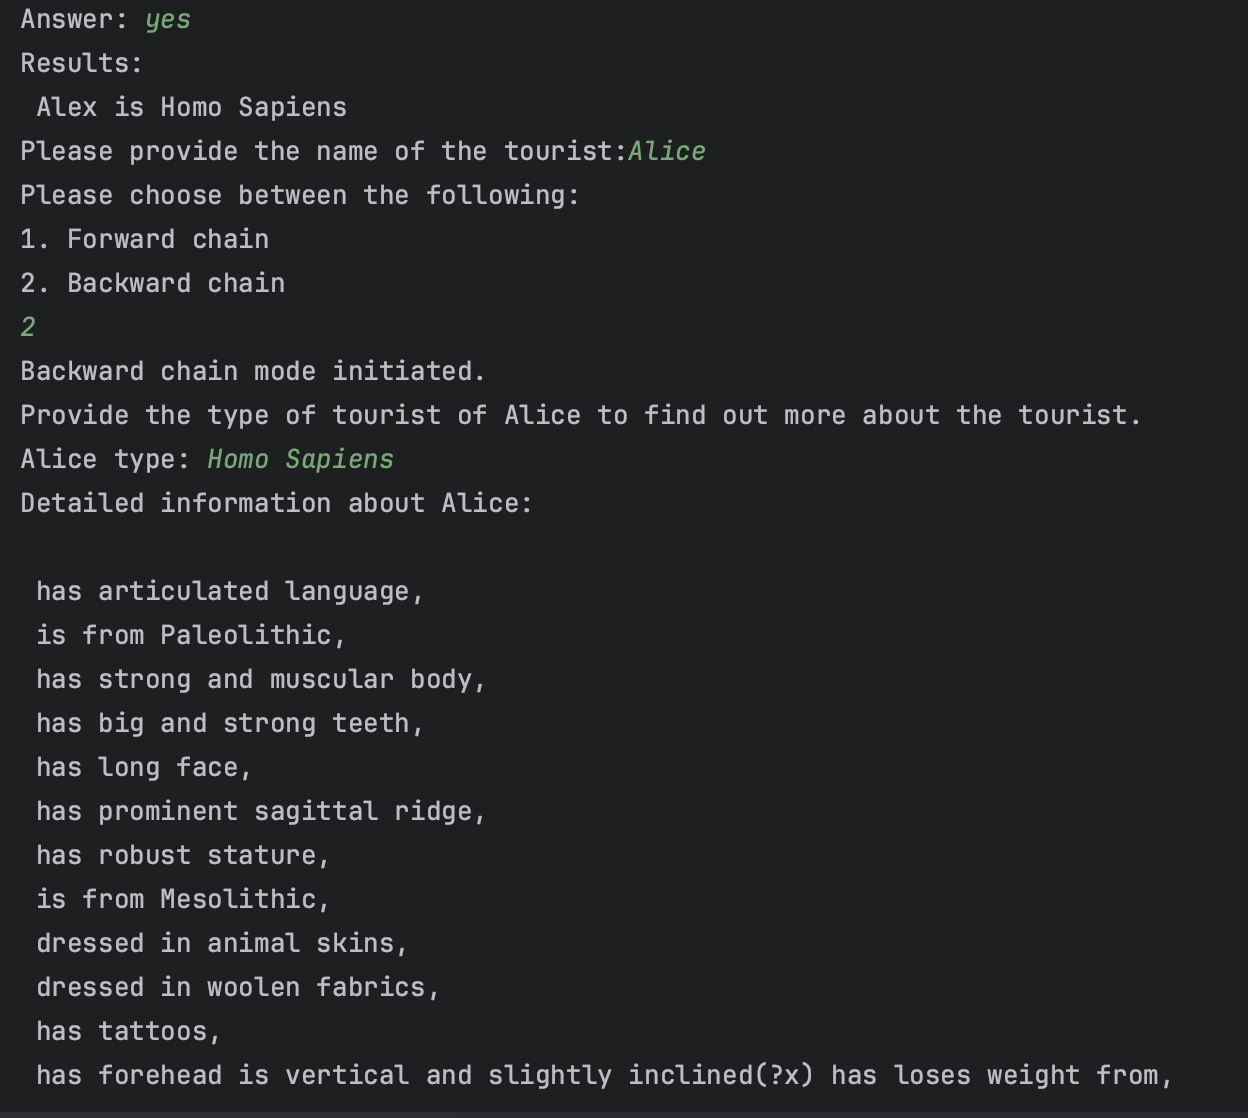

In [8]:
Image(filename="./results/Backward.jpg")

## Conclusions:

Performing this laboratory work, I studied expert systems and their implementation. I learned how to create a knowledge base, create and apply a set of rules to the data set. During the process of implementing the Goal Tree using both forward and backward chaining, I gained invaluable insights into the world of rule-based reasoning and inference. Through forward chaining, I learned how to systematically apply a set of rules to a given data set, allowing me to reach conclusions and expand my knowledge step by step.
The iterative nature of forward chaining allowed me to see how the antecedents and consequences of each rule interconnect forming a pathway to infer more complex information from simpler facts.
Backward chaining provided a different perspective, starting from a specific hypothesis and trying to trace it to its supporting evidence. This method encouraged me to analyze the rules in reverse, dissecting the antecedents to confirm or deny the initial hypothesis.
It was interesting how the algorithm recursively explored the rules, breaking the complex problem into simpler sub-goals until reaching a point where evidence could be found or deduced.

## Bibliography:

[1] Forward and Backward Chaining. Available: https://www.javatpoint.com/forward-chaining-and-backward-chaining-in-ai?fbclid=IwAR1CVjOwMsXtefi1K0tFbe17jqMI5Lbe3c2pyrDQvZKLGgjiLVngim85jJ8
[2] Forward and Backward Reasoning in AI. Available: https://www.almabetter.com/bytes/tutorials/artificial-intelligence/forward-and-backward-reasoning-in-ai
[3] Expert Systems in Artificial Intelligence. Available: https://www.javatpoint.com/expert-systems-in-artificial-intelligence
[4] Python for Beginners. Available: https://www.python.org/about/gettingstarted/
[5] AI With Python Tutorial. Available: https://www.geeksforgeeks.org/python-ai/